# 📜 The Translation Audit: Roman Urdu vs AI
### 🤖 Comparing LLM and Google Translate Performance on 4,000 Sentences

---

> **🗣️ Executive Summary**
> * **Dataset:** 4,000 Parallel Sentences (Roman Urdu -> Urdu Script -> English x2)
> * **Goal:** Analyze translation consensus and linguistic patterns across 20 distinct categories.
> * **Key Insight:** We will use Levenshtein Distance and Jaccard Similarity to measure how often the LLM disagrees with Google.

---

### 📑 Analysis
1.  **Text Preprocessing** - *Normalization & Length Extraction*
2.  **Linguistic EDA** - *Word Clouds & Sentence Complexity*
3.  **The Showdown** - *LLM vs Google Similarity Scores*
4.  **Category Deep Dive** - *Which topics are hardest to translate?*
5.  **N-Gram Analysis** - *Most common Roman Urdu phrases*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/roman-urdu-sentences-urdu-and-english-translations/Roman_Urdu_Parallel_Translation.csv


# Imports and Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from difflib import SequenceMatcher
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 150
sns.set_theme(style="whitegrid")
# Custom Palette
nlp_colors = ["#00897B", "#3949AB", "#D81B60", "#FDD835"]
sns.set_palette(nlp_colors)


print("✅ NLP Toolkit Initialized.")

✅ NLP Toolkit Initialized.


# Load Dataset

In [3]:
# Load Data
df = pd.read_csv('/kaggle/input/roman-urdu-sentences-urdu-and-english-translations/Roman_Urdu_Parallel_Translation.csv')

# Data OverView

In [4]:
df.shape

(4000, 5)

In [5]:
df.head(20)

,category,roman_urdu,urdu_script,translated_by_llm,translated_by_google
0,Health,mujhe bukhar hai,مجھے بخار ہے,I have a fever,I have a fever
1,Health,mera sir dard kar raha hai,میرا سر درد کر رہا ہے,My head hurts,I have a headache
2,Health,mujhe khansi hai,مجھے کھانسی ہے,I am coughing,I have a cough
3,Health,mera gala dard kar raha hai,میرا گلا درد کر رہا ہے,My throat hurts,My throat hurts
4,Health,mujhe pet dard hai,مجھے پیٹ درد ہے,I have a stomach ache,I have a stomach ache
5,Health,mujhe ulti ho rahi hai,مجھے الٹی ہو رہی ہے,I am vomiting,I am vomiting
6,Health,mujhe chakkar aa rahe hain,مجھے چکر آ رہے ہیں,I feel dizzy,I feel dizzy
7,Health,mera badan thak gaya hai,میرا بدن تھک گیا ہے,My body feels tired,My body is tired
8,Health,mujhe sardee lag rahi hai,مجھے سردی لگ رہی ہے,I feel cold,I feel cold
9,Health,mera gala sujan hai,میرا گلا سوجن ہے,My throat is swollen,My throat is swollen


In [6]:
df.isnull().sum()

category                0
roman_urdu              0
urdu_script             0
translated_by_llm       0
translated_by_google    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category              4000 non-null   object
 1   roman_urdu            4000 non-null   object
 2   urdu_script           4000 non-null   object
 3   translated_by_llm     4000 non-null   object
 4   translated_by_google  4000 non-null   object
dtypes: object(5)
memory usage: 156.4+ KB


In [9]:
df.describe(include="all")

,category,roman_urdu,urdu_script,translated_by_llm,translated_by_google
count,4000,4000,4000,4000,4000
unique,20,3992,3968,3956,3956
top,Health,mujhe mild allergy aur skin irritation hai,میرا بدن بہت کمزور اور درد کر رہا ہے,I have muscle cramps and feel fatigued,Daily ferry and boat trips provide a charming ...
freq,200,2,3,3,3


# Feature Engineering

In [10]:
def calculate_similarity(row):
    return SequenceMatcher(None, row['translated_by_llm'], row['translated_by_google']).ratio()

df['Agreement_Score'] = df.apply(calculate_similarity, axis=1)

# Text Lengths
df['Roman_Len'] = df['roman_urdu'].apply(len)
df['English_Len_LLM'] = df['translated_by_llm'].apply(len)

# Word Count
df['Word_Count'] = df['roman_urdu'].apply(lambda x: len(str(x).split()))

# If similarity < 0.6, they said different things
df['High_Disagreement'] = df['Agreement_Score'] < 0.6

print(f"📊 Processed {df.shape[0]} sentences. Average Agreement: {df['Agreement_Score'].mean():.2f}")
df[['roman_urdu', 'translated_by_llm', 'translated_by_google', 'Agreement_Score']].head()

📊 Processed 4000 sentences. Average Agreement: 0.86


,roman_urdu,translated_by_llm,translated_by_google,Agreement_Score
0,mujhe bukhar hai,I have a fever,I have a fever,1.000000
1,mera sir dard kar raha hai,My head hurts,I have a headache,0.400000
2,mujhe khansi hai,I am coughing,I have a cough,0.666667
3,mera gala dard kar raha hai,My throat hurts,My throat hurts,1.000000
4,mujhe pet dard hai,I have a stomach ache,I have a stomach ache,1.000000


# Visualization

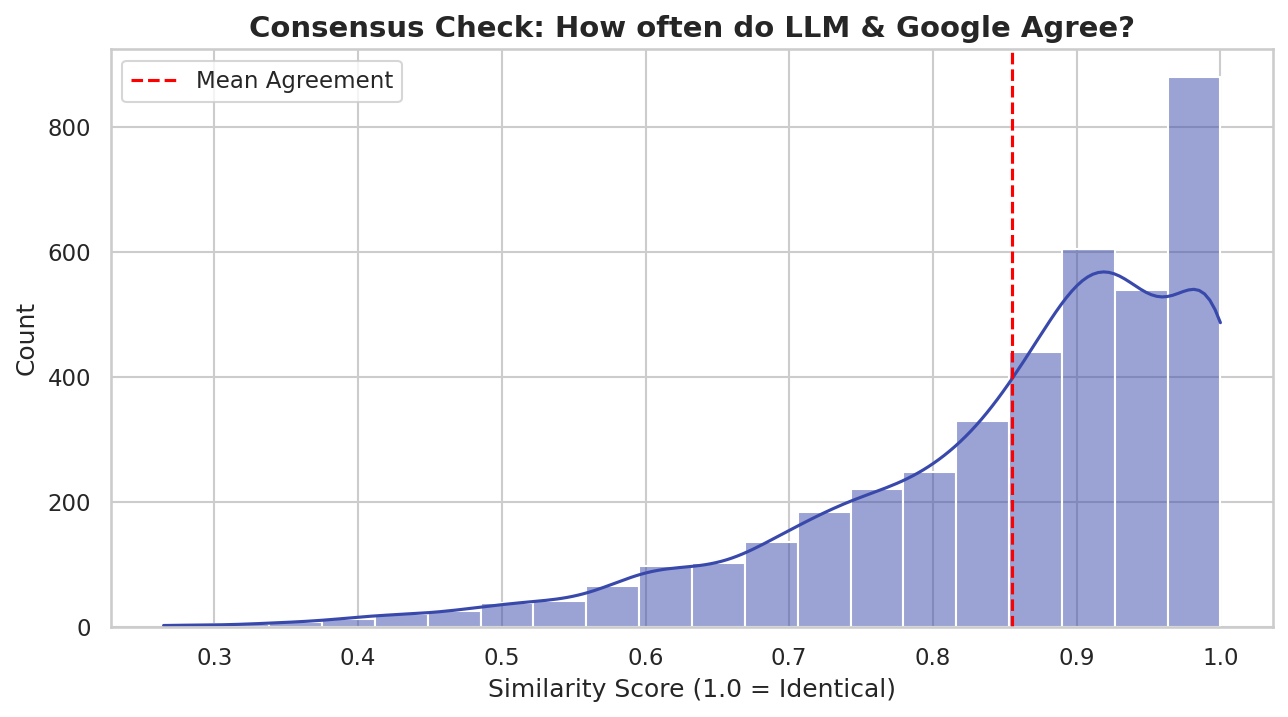

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Agreement_Score'], bins=20, kde=True, color='#3949AB')
plt.title('Consensus Check: How often do LLM & Google Agree?', fontsize=14, weight='bold')
plt.xlabel('Similarity Score (1.0 = Identical)')
plt.axvline(df['Agreement_Score'].mean(), color='red', linestyle='--', label='Mean Agreement')
plt.legend()
plt.show()

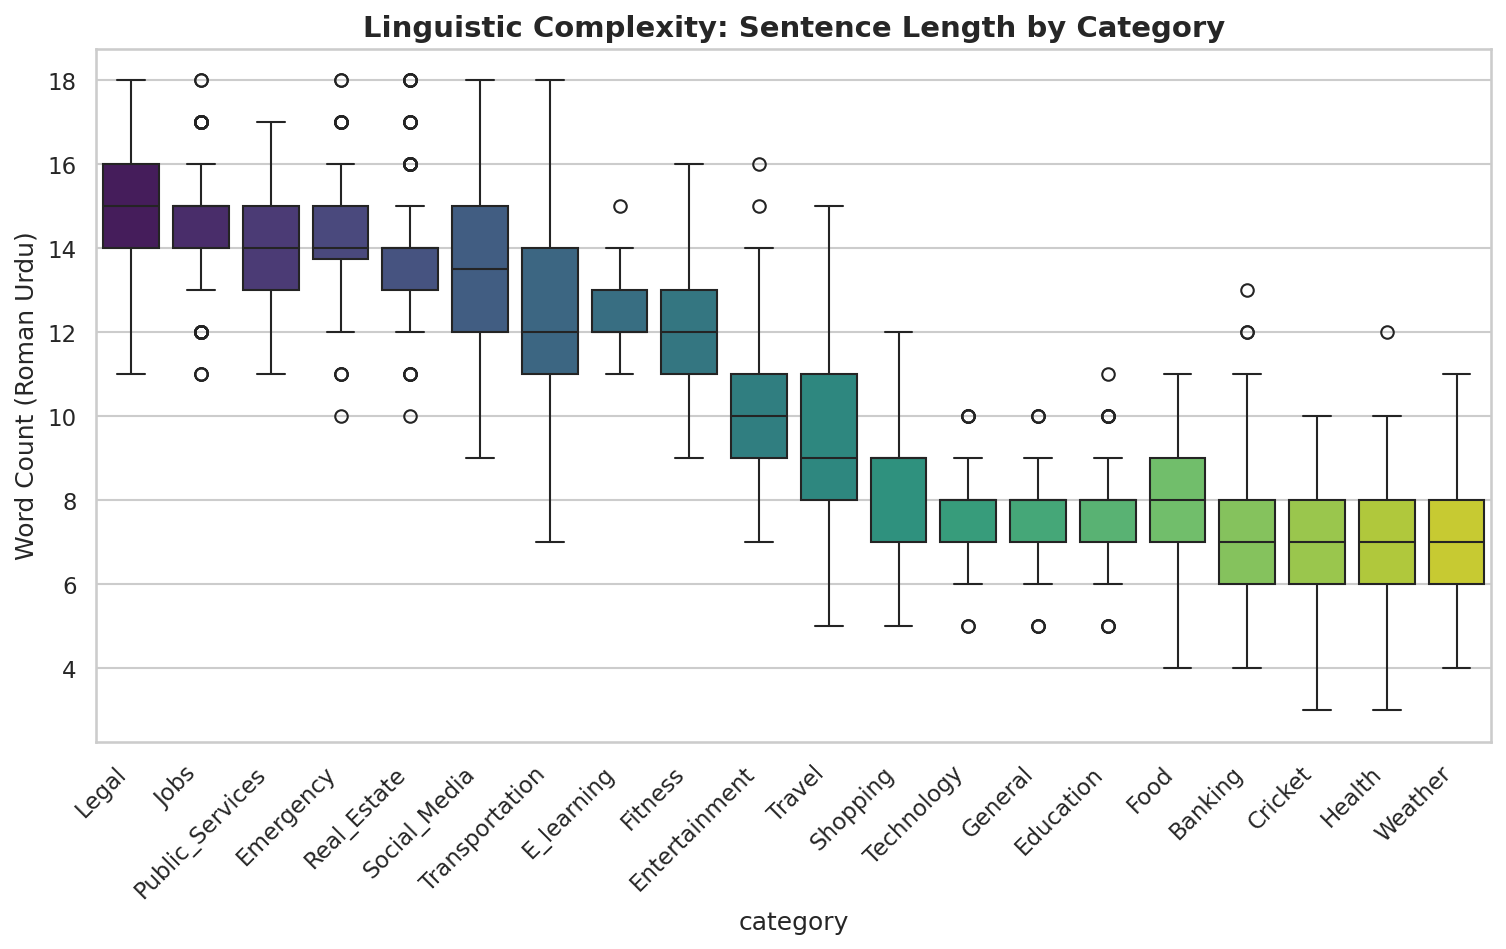

In [12]:
plt.figure(figsize=(12, 6))
order = df.groupby('category')['Word_Count'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='category', y='Word_Count', order=order, palette='viridis')
plt.title('Linguistic Complexity: Sentence Length by Category', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Word Count (Roman Urdu)')
plt.show()

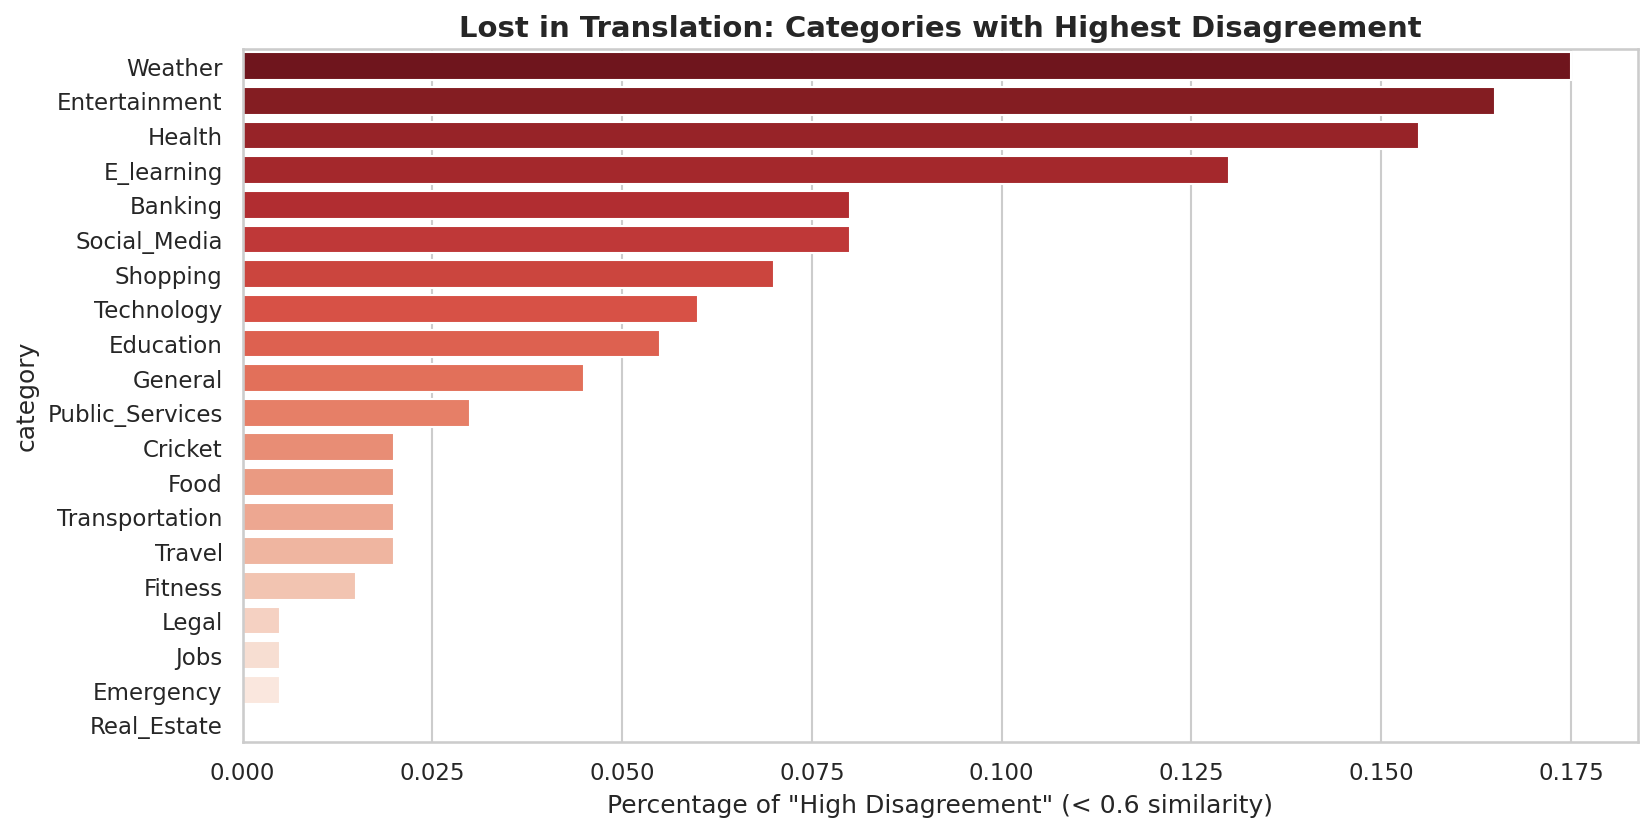

In [13]:
X = df.groupby('category')['High_Disagreement'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=X.values, y=X.index, palette='Reds_r')
plt.title('Lost in Translation: Categories with Highest Disagreement', fontsize=14, weight='bold')
plt.xlabel('Percentage of "High Disagreement" (< 0.6 similarity)')
plt.show()

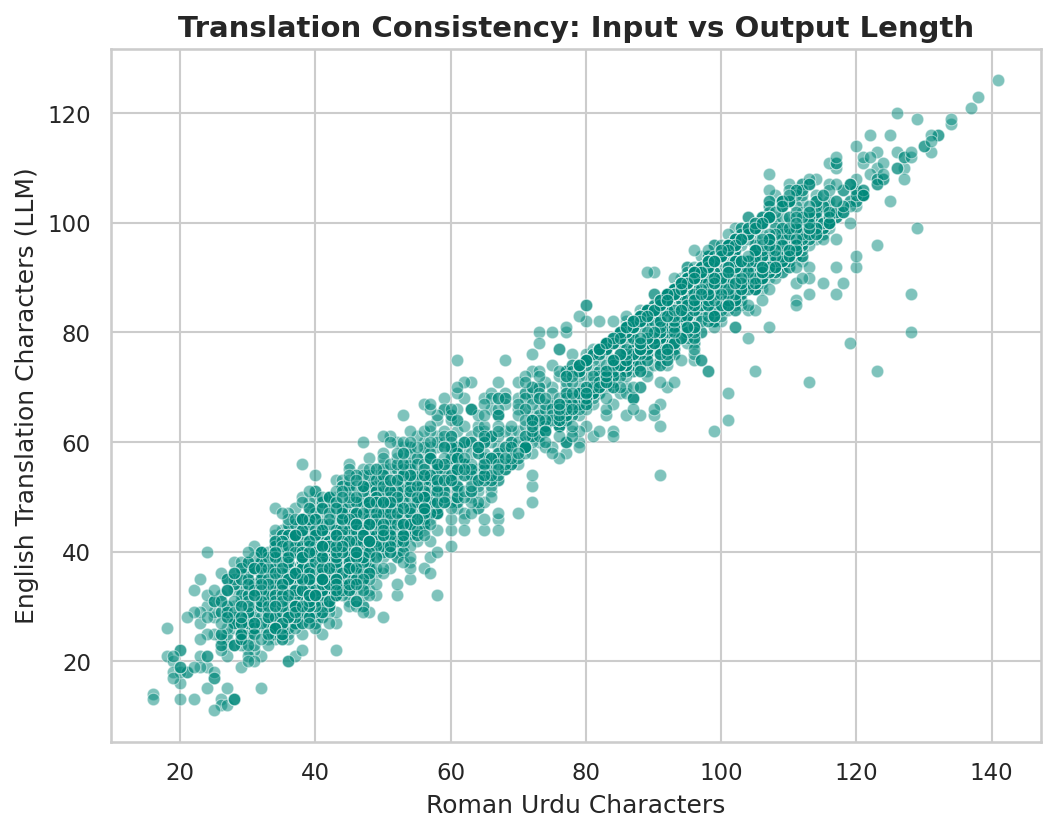

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Roman_Len', y='English_Len_LLM', data=df, alpha=0.5, color='#00897B')
plt.title('Translation Consistency: Input vs Output Length', fontsize=14, weight='bold')
plt.xlabel('Roman Urdu Characters')
plt.ylabel('English Translation Characters (LLM)')
plt.show()

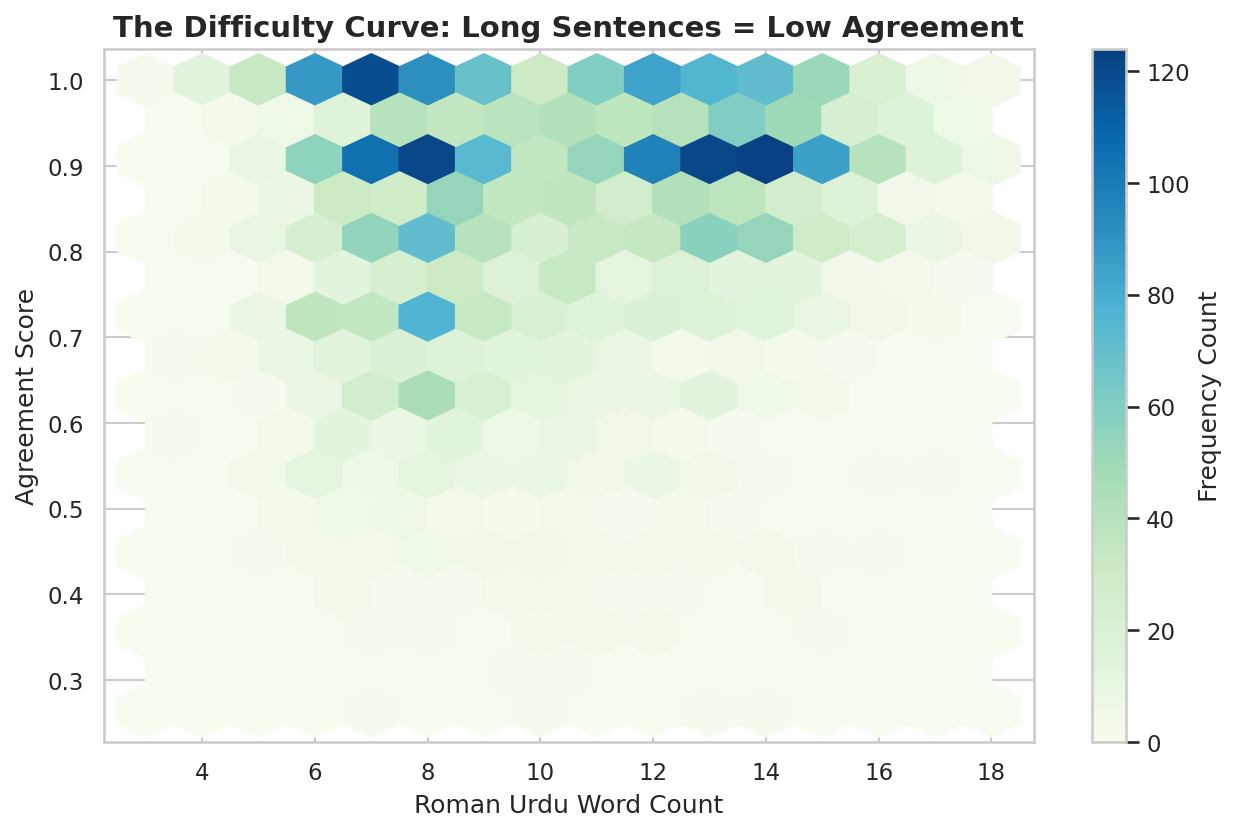

In [15]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Word_Count'], df['Agreement_Score'], gridsize=15, cmap='GnBu')
plt.colorbar(label='Frequency Count')
plt.title('The Difficulty Curve: Long Sentences = Low Agreement', fontsize=14, weight='bold')
plt.xlabel('Roman Urdu Word Count')
plt.ylabel('Agreement Score')
plt.show()

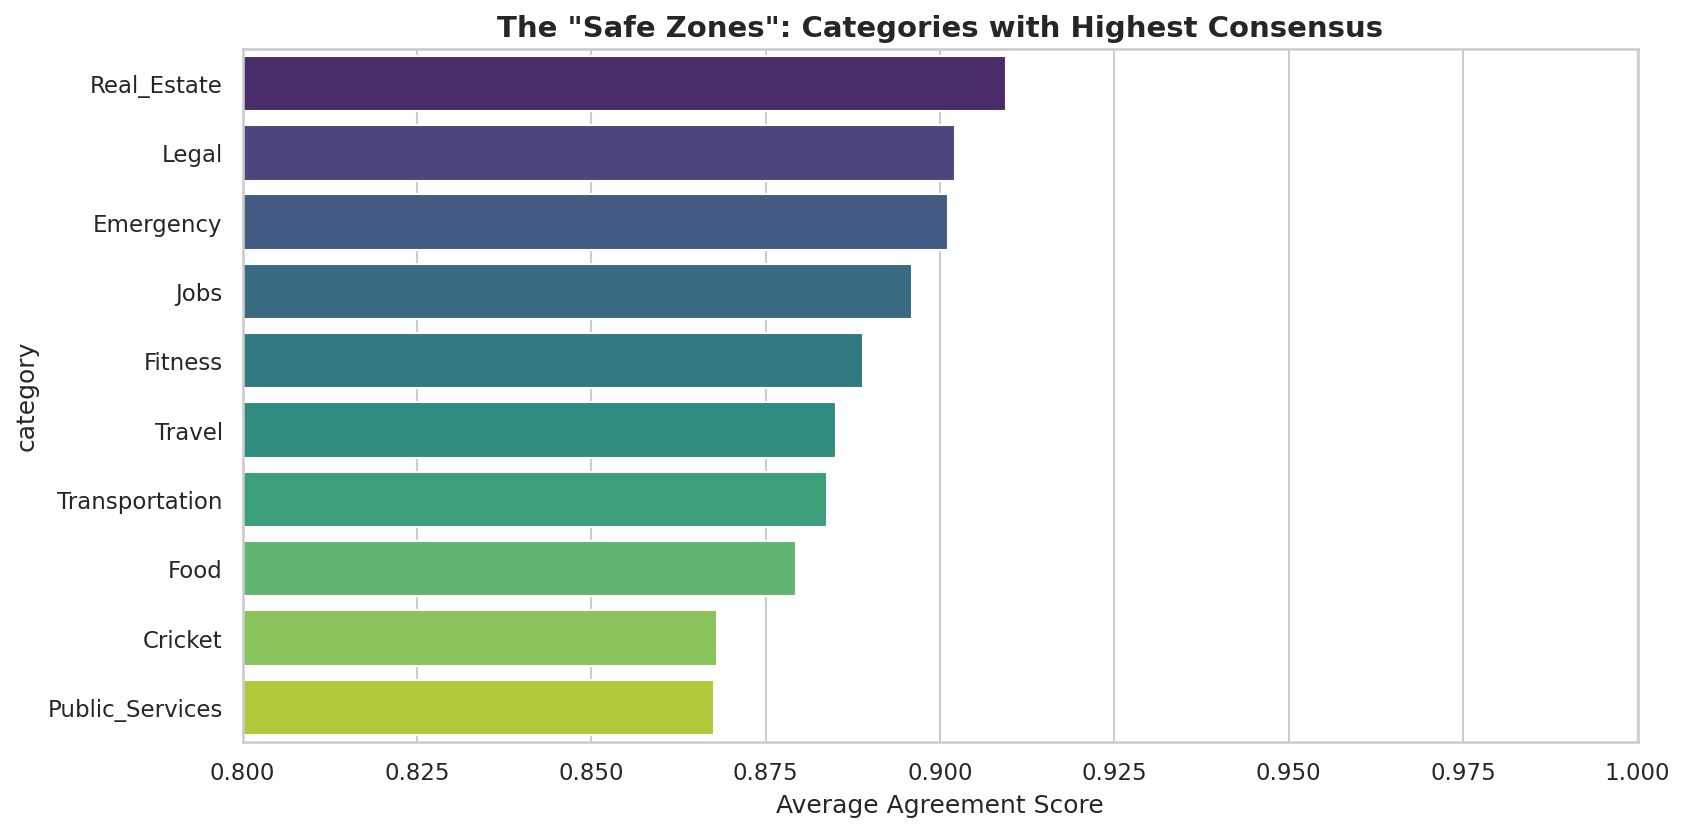

In [16]:
plt.figure(figsize=(12, 6))
top_agreed = df.groupby('category')['Agreement_Score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_agreed.values, y=top_agreed.index, palette='viridis')
plt.title('The "Safe Zones": Categories with Highest Consensus', fontsize=14, weight='bold')
plt.xlim(0.8, 1.0)
plt.xlabel('Average Agreement Score')
plt.show()

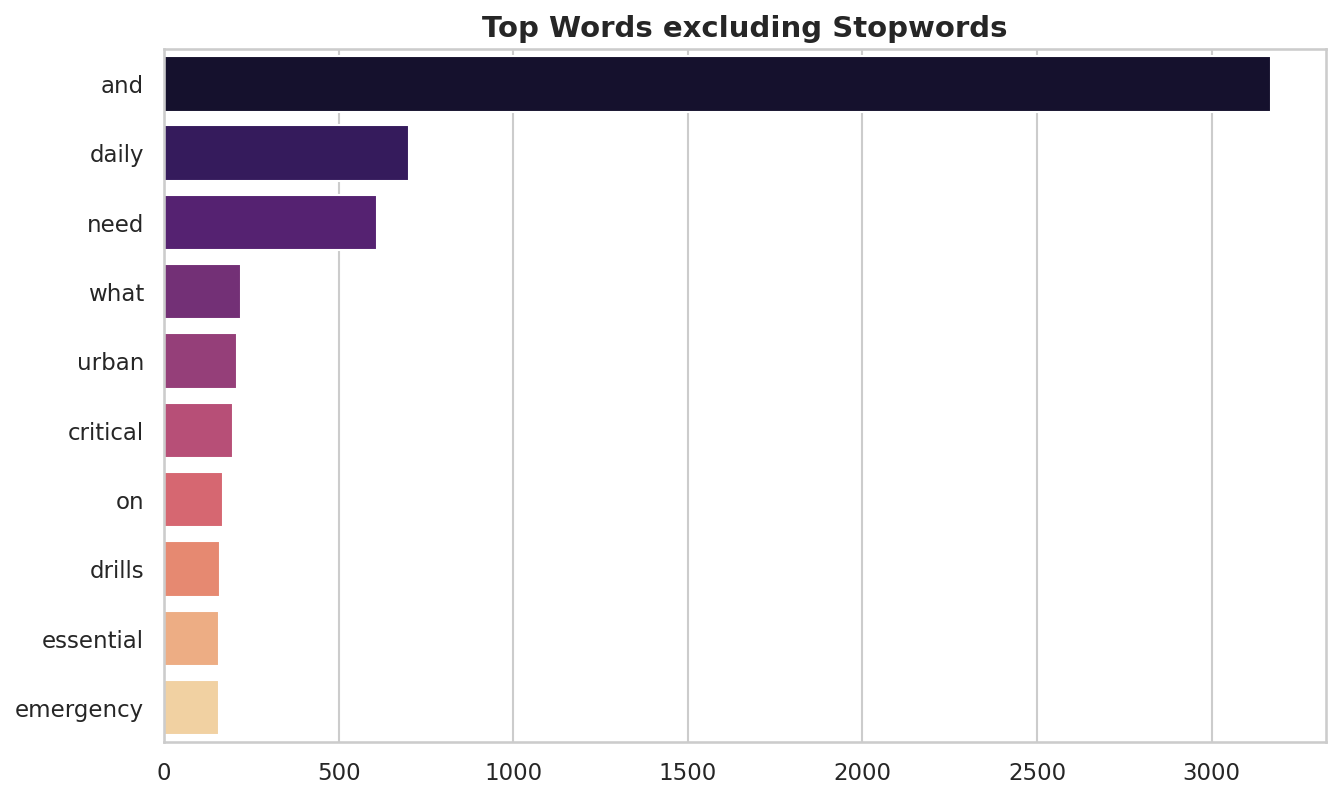

In [17]:
def get_top_unigrams(corpus, top_k=10):
    words = [w for s in corpus for w in str(s).lower().split()]
    stopwords = ['i', 'have', 'the', 'is', 'to', 'a', 'my', 'am', 'are', 'in', 'for', 'of']
    words = [w for w in words if w not in stopwords]
    return Counter(words).most_common(top_k)

top_words = get_top_unigrams(df['translated_by_llm'])
labels, values = zip(*top_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(values), y=list(labels), palette='magma')
plt.title('Top Words excluding Stopwords', fontsize=14, weight='bold')
plt.show()

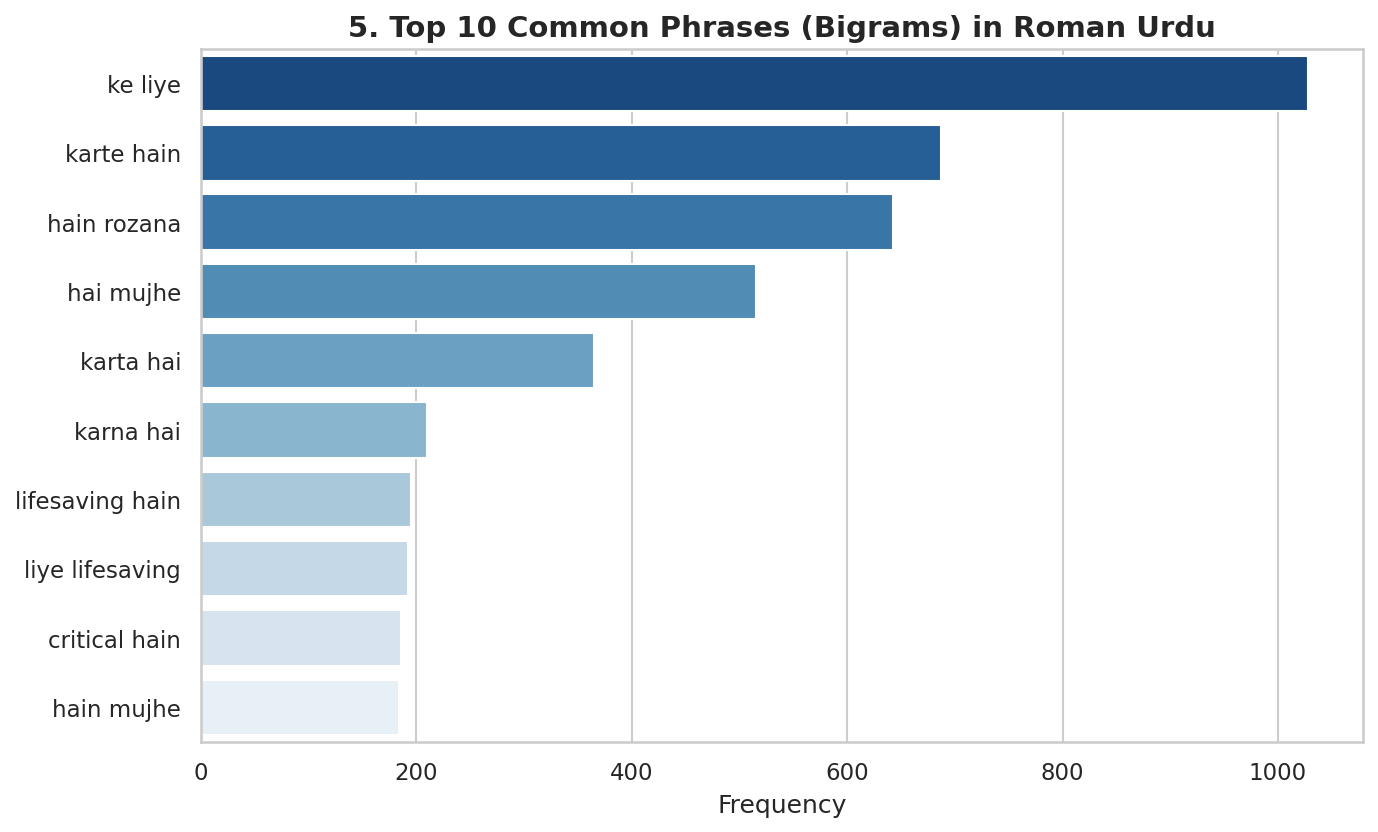

In [18]:
# Function to get top N-grams
def get_top_ngrams(corpus, n=2, top_k=10):
    words = [w for s in corpus for w in s.lower().split()]
    ngrams = zip(*[words[i:] for i in range(n)])
    return Counter(ngrams).most_common(top_k)

# Get Top Bigrams
top_bigrams = get_top_ngrams(df['roman_urdu'], n=2)
bigram_labels = [f"{x[0]} {x[1]}" for x, _ in top_bigrams]
bigram_counts = [y for _, y in top_bigrams]

plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_counts, y=bigram_labels, palette='Blues_r')
plt.title('5. Top 10 Common Phrases (Bigrams) in Roman Urdu', fontsize=14, weight='bold')
plt.xlabel('Frequency')
plt.show()

# Thanks! 

---